# Load required packages

In [97]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Read data table

In [98]:
df0 = pd.read_excel(
    'G:/Experiments/Paper/FD_lifestyle_changes/ncbi_genome_table_20220812/20221107.xlsx')

In [99]:
# check columns
df0.columns

Index(['Assembly', 'Strain', 'longLabel', 'Class', 'Subclass', 'Order',
       'Family', 'Genus', 'Link', 'Name_NCBI', 'Name_this_study',
       'Strain_or_specimen', 'Lifestyle', 'Lifestyle_ref', 'Gender',
       'Gender_ref', 'Habitat', 'Habitat_ref', 'Sources', 'Comment',
       'WGS_platform', 'WGS_platform_ref', 'WGS_class', 'WGS_class_details',
       'Genome_size', 'GC_content', 'Contig_scaffold_number', 'N50', 'BUSCO',
       'Genome_size_without_TE', 'TE_size', 'GC_content_without_TE',
       'GC_content_TE', 'Gene_number', 'GO_number', 'Gene_length_min',
       'Gene_length_max', 'Gene_length_mean', 'Intergenic_length_min',
       'Intergenic_length_max', 'Intergenic_length_mean', 'Exon_number',
       'Exon_length_min', 'Exon_length_max', 'Exon_length_mean',
       'Intron_number', 'Intron_length_min', 'Intron_length_max',
       'Intron_length_mean', 'Protein_number', 'tRNA_number',
       'tRNA_length_min', 'tRNA_length_max', 'tRNA_length_mean',
       'Secreted_protein_nu

In [100]:
# remove outgroup
df1 = df0[ df0['Assembly'] != "GCA_024752465.1" ]

In [101]:
# remove the rcords with undetermined lifestyls
df2 = df1[ df1['Lifestyle'] != "undetermined" ]
df2.shape

(537, 83)

In [102]:
# remove nematophagous fungi with only 3 records
df3 = df2[ df2['Lifestyle'] != "nematophagous fungi" ]
df3.shape

(534, 83)

In [103]:
# df4 required list
df4_col_lst = ['Lifestyle','Genome_size', 'GC_content', 'Genome_size_without_TE', 'TE_size', 'GC_content_without_TE',
       'GC_content_TE', 'Gene_number',  'Gene_length_min',
       'Gene_length_max', 'Gene_length_mean', 'Intergenic_length_min',
       'Intergenic_length_max', 'Intergenic_length_mean', 'Exon_number',
       'Exon_length_min', 'Exon_length_max', 'Exon_length_mean',
       'Intron_number', 'Intron_length_min', 'Intron_length_max',
       'Intron_length_mean', 'tRNA_number',
       'tRNA_length_min', 'tRNA_length_max', 'tRNA_length_mean',]
print("Basic genomic feature table:", len(df4_col_lst))

# df5 required list
df5_col_lst = ['Lifestyle', 'Secreted_protein_number', 'Effector_number', 'Protease', 'Lipase',
       'SSPs', 'Other', 'CAZy', 'GH', 'GT', 'PL', 'CE', 'AA', 'CBM', 'PCWDE',
       'FCWDE', 'Cellulose', 'Hemicellulose', 'Lignin', 'Pectin',
       'Peptidoglycan', 'Mannan', 'Glucan', 'Chitin', 'Sucrose',]

print("Functional protein group table:",len(df5_col_lst))

# df6 required list
df6_col_lst = ['Lifestyle','Genome_size', 'GC_content', 'Genome_size_without_TE', 'TE_size', 'GC_content_without_TE',
       'GC_content_TE', 'Gene_number',  'Gene_length_min',
       'Gene_length_max', 'Gene_length_mean', 'Intergenic_length_min',
       'Intergenic_length_max', 'Intergenic_length_mean', 'Exon_number',
       'Exon_length_min', 'Exon_length_max', 'Exon_length_mean',
       'Intron_number', 'Intron_length_min', 'Intron_length_max',
       'Intron_length_mean', 'tRNA_number',
       'tRNA_length_min', 'tRNA_length_max', 'tRNA_length_mean','Secreted_protein_number', 'Effector_number', 'Protease', 'Lipase',
       'SSPs', 'Other', 'CAZy', 'GH', 'GT', 'PL', 'CE', 'AA', 'CBM', 'PCWDE',
       'FCWDE', 'Cellulose', 'Hemicellulose', 'Lignin', 'Pectin',
       'Peptidoglycan', 'Mannan', 'Glucan', 'Chitin', 'Sucrose',]
print('together feature table:', len(df6_col_lst))


Basic genomic feature table: 26
Functional protein group table: 25
together feature table: 50


# Predicting lifestyles based on basic genomic features

## Datatable of basic genomic features

In [104]:
df4 = df3[df4_col_lst]

In [105]:
df4.head()

,Lifestyle,Genome_size,GC_content,Genome_size_without_TE,TE_size,GC_content_without_TE,GC_content_TE,Gene_number,Gene_length_min,Gene_length_max,...,Exon_length_max,Exon_length_mean,Intron_number,Intron_length_min,Intron_length_max,Intron_length_mean,tRNA_number,tRNA_length_min,tRNA_length_max,tRNA_length_mean
3,human pathogen,39610346.0,49.201,37550957.0,2059389.0,50.862,18.927,9686.0,163.0,24657.0,...,14709.0,525.0,19056.0,6.0,6516.0,135.0,284.0,71.0,178.0,86.0
4,human pathogen,43295657.0,50.693,41927685.0,1367972.0,51.353,30.467,11116.0,122.0,23902.0,...,14660.0,519.0,21500.0,7.0,2545.0,97.0,271.0,71.0,178.0,86.0
5,plant pathogen,29710167.0,51.872,28982425.0,727742.0,52.265,36.217,8681.0,201.0,19326.0,...,14904.0,557.0,15898.0,29.0,2594.0,107.0,189.0,71.0,140.0,89.0
6,plant pathogen,30032304.0,55.471,29643153.0,389151.0,55.574,47.643,8458.0,201.0,18051.0,...,14889.0,565.0,15597.0,47.0,6899.0,130.0,172.0,71.0,197.0,88.0
8,mycoparasite,55053633.0,49.805,53878192.0,1175441.0,50.286,27.740,16563.0,201.0,65700.0,...,14930.0,536.0,30509.0,40.0,4734.0,77.0,224.0,70.0,219.0,89.0


## Correlations analysis

In [106]:
corr = df4.set_index('Lifestyle').corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\cheny\AppData\Local\Temp\ipykernel_15004\951506049.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Genome_size,GC_content,Genome_size_without_TE,TE_size,GC_content_without_TE,GC_content_TE,Gene_number,Gene_length_min,Gene_length_max,Gene_length_mean,Intergenic_length_min,Intergenic_length_max,Intergenic_length_mean,Exon_number,Exon_length_min,Exon_length_max,Exon_length_mean,Intron_number,Intron_length_min,Intron_length_max,Intron_length_mean,tRNA_number,tRNA_length_min,tRNA_length_max,tRNA_length_mean
Genome_size,1.00,-0.43,0.84,0.65,-0.14,-0.34,0.68,0.08,0.06,-0.44,-0.12,0.32,0.42,0.69,0.06,0.11,-0.44,0.68,0.09,-0.07,-0.24,0.40,-0.20,0.39,0.30
GC_content,-0.43,1.00,-0.21,-0.49,0.83,0.39,-0.20,0.01,-0.08,0.25,0.14,-0.17,-0.12,-0.19,-0.03,0.01,0.12,-0.19,0.05,0.21,0.27,-0.29,0.08,0.00,-0.10
Genome_size_without_TE,0.84,-0.21,1.00,0.15,-0.18,-0.26,0.91,0.05,0.12,-0.57,-0.13,0.08,0.11,0.91,0.06,0.19,-0.50,0.89,0.07,-0.15,-0.40,0.48,-0.21,0.38,0.32
TE_size,0.65,-0.49,0.15,1.00,-0.01,-0.26,-0.03,0.08,-0.07,-0.01,-0.04,0.48,0.62,-0.01,0.02,-0.06,-0.12,0.00,0.07,0.08,0.12,0.06,-0.08,0.19,0.10
GC_content_without_TE,-0.14,0.83,-0.18,-0.01,1.00,0.16,-0.28,0.08,-0.15,0.30,0.11,0.08,0.12,-0.25,-0.04,-0.03,0.05,-0.23,0.12,0.31,0.44,-0.34,0.05,0.11,-0.06
GC_content_TE,-0.34,0.39,-0.26,-0.26,0.16,1.00,-0.16,-0.27,-0.07,0.10,0.21,-0.28,-0.17,-0.22,0.05,-0.03,0.25,-0.23,-0.33,-0.01,0.07,-0.06,0.00,-0.13,-0.24
Gene_number,0.68,-0.20,0.91,-0.03,-0.28,-0.16,1.00,-0.07,0.13,-0.72,-0.11,-0.08,-0.18,0.97,0.01,0.30,-0.50,0.94,-0.04,-0.22,-0.59,0.45,-0.16,0.30,0.29
Gene_length_min,0.08,0.01,0.05,0.08,0.08,-0.27,-0.07,1.00,0.10,0.25,-0.18,0.33,0.33,0.03,0.03,-0.08,-0.05,0.04,0.69,0.16,0.07,-0.05,0.13,0.01,0.14
Gene_length_max,0.06,-0.08,0.12,-0.07,-0.15,-0.07,0.13,0.10,1.00,-0.04,-0.01,0.04,-0.02,0.17,0.08,0.24,-0.11,0.18,0.06,-0.08,-0.25,0.12,0.10,-0.13,-0.09
Gene_length_mean,-0.44,0.25,-0.57,-0.01,0.30,0.10,-0.72,0.25,-0.04,1.00,0.01,0.17,0.31,-0.65,0.01,-0.34,0.51,-0.62,0.24,0.44,0.77,-0.33,0.20,-0.18,-0.31


## Scale numerical data and split data table into training dataset and test dataset

In [107]:
X = df4.iloc[:, 1:26]
y = df4.iloc[:, 0]

# scaled numerical features 
X = df4.iloc[:,1:26]
standardscaler = StandardScaler()
standardscaler.fit(X)
X_scaled =  standardscaler.transform(X)
X_scaled

array([[-0.24530302, -0.28989521, -0.23602465, ...,  0.52214333,
         0.11202915, -0.58592268],
       [ 0.06983864,  0.1111975 ,  0.25367681, ...,  0.52214333,
         0.11202915, -0.58592268],
       [-1.0918961 ,  0.42814675, -1.19473686, ...,  0.52214333,
        -0.73716601,  0.26353264],
       ...,
       [-1.2128648 , -0.12187715, -1.42613647, ..., -1.45067181,
        -0.96063842, -2.00168155],
       [-0.6100413 ,  1.19188963, -0.50177474, ...,  0.85094586,
        -0.1337905 ,  1.67929152],
       [-1.76014552,  0.73488052, -1.99002084, ...,  0.52214333,
        -0.33491567, -0.01961913]])

## Remove features that have same value in all samples

In [108]:
sel = VarianceThreshold(threshold=0)

sel.fit_transform(X)

# number of features to fit
print('number of features to fit:\n', sel.n_features_in_)
print('feature names of input\n', sel.feature_names_in_)
print()

print('number of features to out:\n',sel.get_feature_names_out().shape[0])
print('feature names after filter:\n',sel.get_feature_names_out()) 
print()

# variance of each feature
print("variance of each feature:\n",sel.variances_) 

number of features to fit:
 25
feature names of input
 ['Genome_size' 'GC_content' 'Genome_size_without_TE' 'TE_size'
 'GC_content_without_TE' 'GC_content_TE' 'Gene_number' 'Gene_length_min'
 'Gene_length_max' 'Gene_length_mean' 'Intergenic_length_min'
 'Intergenic_length_max' 'Intergenic_length_mean' 'Exon_number'
 'Exon_length_min' 'Exon_length_max' 'Exon_length_mean' 'Intron_number'
 'Intron_length_min' 'Intron_length_max' 'Intron_length_mean'
 'tRNA_number' 'tRNA_length_min' 'tRNA_length_max' 'tRNA_length_mean']

number of features to out:
 25
feature names after filter:
 ['Genome_size' 'GC_content' 'Genome_size_without_TE' 'TE_size'
 'GC_content_without_TE' 'GC_content_TE' 'Gene_number' 'Gene_length_min'
 'Gene_length_max' 'Gene_length_mean' 'Intergenic_length_min'
 'Intergenic_length_max' 'Intergenic_length_mean' 'Exon_number'
 'Exon_length_min' 'Exon_length_max' 'Exon_length_mean' 'Intron_number'
 'Intron_length_min' 'Intron_length_max' 'Intron_length_mean'
 'tRNA_number' 'tRNA_

## split data into train and test subsets

In [109]:
# split data into trainning data and test data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=111)

## K-Nearest Neighbors (KNN)

### GridSearchCV to optimize parameters

In [110]:
#gridsearchCV optimize parameters to improve estimator
params = {'n_neighbors': [i for i in range(1, 15)],
          'weights': ['uniform', 'distance'],
          'p': [1,2]}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)


print('Label: ', grid.classes_)
print()
print("Accuracy in test dataset：", grid.score(X_test,y_test))
print("Best score in cross validation：", grid.best_score_)
print("Best model：", grid.best_estimator_)

Label:  ['endophyte' 'entomopathogen' 'human pathogen' 'mycoparasite'
 'plant pathogen' 'saprophyte']

Accuracy in test dataset： 0.8260869565217391
Best score in cross validation： 0.7880360360360361
Best model： KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')


### cross validate with optimized parameters

In [111]:
# to obtain the average cuuracy by corss_validation
knn = grid.best_estimator_
knn_sm = cross_val_score(knn, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
knn_sm

array([0.8       , 0.84      , 0.78666667, 0.72972973, 0.78378378])

## Logistic Regression

### GridSearchCV to optimize parameters

In [112]:
parameters = {'multi_class': ['multinomial'],
              
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
             }

lr = LogisticRegression(max_iter=5000, class_weight='balanced')
grid = GridSearchCV(
    lr, parameters,  verbose=0, scoring='accuracy', cv=5)

grid = grid.fit(X_train, y_train)

print('Best score：%0.3f' % grid.best_score_)
best_parameters = grid.best_estimator_.get_params()
print('Best prameters：n', best_parameters)

Best score：0.533
Best prameters：n {'C': 10, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 5000, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### cross validation

In [113]:
lr = grid.best_estimator_
lr_sm = cross_val_score(lr, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
lr_sm

array([0.6       , 0.57333333, 0.50666667, 0.5       , 0.48648649])

## Support Vector Machines

In [114]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm = SVC()
grid = GridSearchCV(
    svm, tuned_parameters,  verbose=0, scoring='accuracy', cv=5)

grid = grid.fit(X_train, y_train)

print('Best score：%0.3f' % grid.best_score_)
best_parameters = grid.best_estimator_.get_params()
print('Best prameters：n', best_parameters)

Best score：0.732
Best prameters：n {'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [115]:
svm = grid.best_estimator_
svm_sm = cross_val_score(svm, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
svm_sm

array([0.74666667, 0.74666667, 0.70666667, 0.71621622, 0.74324324])

## Naive Bayes

### select the prppriate methods

In [116]:
gaussian = GaussianNB()
multi = MultinomialNB() # not for minus values of features
bernoul = BernoulliNB()
models = [gaussian, bernoul]

In [117]:
gaussian =  GaussianNB() 
cross_val_score(gaussian, X_train, y_train, scoring='accuracy',
                         cv=5).mean()  # cross_validation

0.3672072072072072

In [118]:
cross_val_score(bernoul, X_train, y_train, scoring='accuracy',
                         cv=5).mean()  # cross_validation

0.5708108108108108

### cross validation

In [119]:
bayes_sm = cross_val_score(bernoul, X_train, y_train, scoring='accuracy',
                         cv=5)
bayes_sm

array([0.58666667, 0.61333333, 0.6       , 0.54054054, 0.51351351])

## Decision Tree

In [120]:
# 用GridSearchCV寻找最优参数（列表）
param = [{'criterion':['gini'],'max_depth':[30,50,60,100],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5]},
         {'criterion':['gini','entropy']},
         {'max_depth': [30,60,100], 'min_impurity_decrease':[0.1,0.2,0.5]}]
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param, scoring='accuracy', cv=5)
grid.fit(X_train,y_train)

print('最优分类器:',grid.best_params_,'最优分数:', grid.best_score_)  # 得到最优的参数和分值


最优分类器: {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} 最优分数: 0.689009009009009


### Cross validation

In [121]:
dt = grid.best_estimator_
dt_sm = cross_val_score(dt, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
dt_sm

array([0.68      , 0.69333333, 0.69333333, 0.68918919, 0.68918919])

## Random Forest Classifiers

### GridSearchCV

In [122]:
param_test1 = {"n_estimators":range(1,101,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,
                         scoring='accuracy',cv=5)
gsearch1.fit(X_train,y_train)
 
print("best score:", gsearch1.best_score_)
print("best n_estimators", gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

best score: 0.7828468468468469
best n_estimators {'n_estimators': 41}
best accuracy:0.782847


In [123]:
gsearch1.classes_

array(['endophyte', 'entomopathogen', 'human pathogen', 'mycoparasite',
       'plant pathogen', 'saprophyte'], dtype=object)

### cross validation

In [124]:
rfc = gsearch1.best_estimator_
rfc_sm = cross_val_score(rfc, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
rfc_sm

array([0.8       , 0.74666667, 0.77333333, 0.77027027, 0.75675676])

## compare the accuracy of different calssifiers

In [125]:
accuracy_df = pd.DataFrame({'KNN':knn_sm,
                            'LR':lr_sm,
                            'SVM':svm_sm,
                            'Bayes':bayes_sm,
                            'DT':dt_sm,
                            'RF':rfc_sm
})

In [126]:
accuracy_df

,KNN,LR,SVM,Bayes,DT,RF
0,0.800000,0.600000,0.746667,0.586667,0.680000,0.800000
1,0.840000,0.573333,0.746667,0.613333,0.693333,0.746667
2,0.786667,0.506667,0.706667,0.600000,0.693333,0.773333
3,0.729730,0.500000,0.716216,0.540541,0.689189,0.770270
4,0.783784,0.486486,0.743243,0.513514,0.689189,0.756757


In [127]:
accuracy_df.mean()

KNN      0.788036
LR       0.533297
SVM      0.731892
Bayes    0.570811
DT       0.689009
RF       0.769405
dtype: float64

In [128]:
df_accuracy = accuracy_df.melt(var_name='Classifier',value_name='Accuracy')
# output accuracies of clasifiers
df_accuracy.to_csv('classifiers_accuracy_basic_genomic_features.csv')

In [129]:
df_accuracy.mean()

C:\Users\cheny\AppData\Local\Temp\ipykernel_15004\209495019.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_accuracy.mean()


Accuracy    0.680408
dtype: float64

<AxesSubplot:xlabel='Classifier', ylabel='Accuracy'>

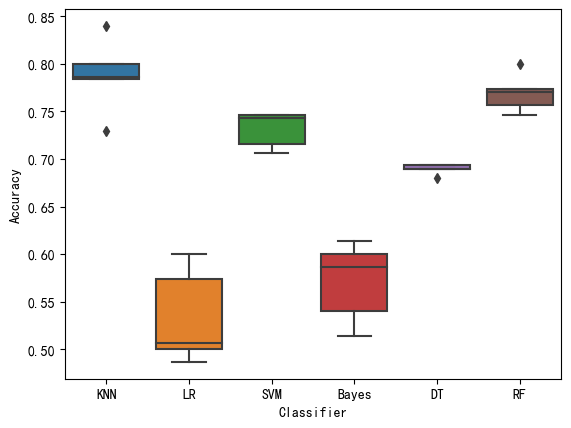

In [130]:
sns.boxplot(data=df_accuracy, x='Classifier', y='Accuracy')

## use the best classifier to predict and use confusion_matrix to display the accuracy

In [131]:
# 显示混淆矩阵
def plot_confuse_data(model, x_val, y_val):
    classes = ['endophyte', 'entomopathogen', 'human pathogen', 'mycoparasite',
       'plant pathogen', 'saprophyte']
    
    predictions = model.predict(x_val)
    truelabel = y_val   # 将one-hot转化为label
    confusion = confusion_matrix(y_true=truelabel, y_pred=predictions)
    
    #颜色风格为绿。。。。
    plt.imshow(confusion, cmap=plt.cm.Greens)
# ticks 坐标轴的坐标点
# label 坐标轴标签说明
    indices = range(len(confusion))
# 第一个是迭代对象，表示坐标的显示顺序，第二个参数是坐标轴显示列表
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion matrix')

# plt.rcParams两行是用于解决标签不能显示汉字的问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

# 显示数据
    for first_index in range(len(confusion)):    #第几行
        for second_index in range(len(confusion[first_index])):    #第几列
            plt.text(first_index, second_index, confusion[first_index][second_index])
# 显示
    plt.show()

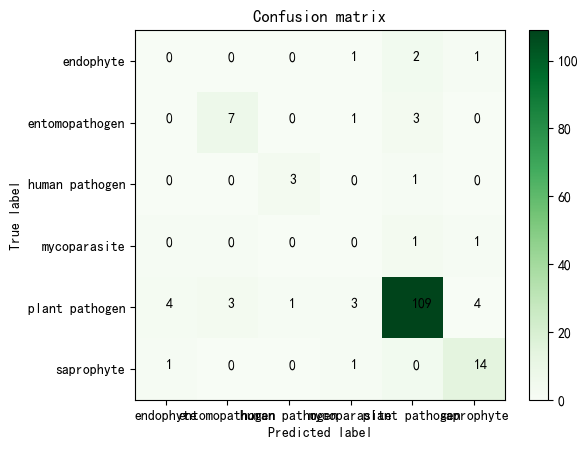

In [132]:
plot_confuse_data(knn,X_test,y_test)

In [133]:
def plot_confuse(model, x_val, y_val):
   # 获得预测结果
    predictions = model.predict(x_val)
    #获得真实标签
    truelabel = y_val   # 将one-hot转化为label
    cm = confusion_matrix(y_true=truelabel, y_pred=predictions)
   
    plt.figure()
    # 指定分类类别
    classes = ['endophyte', 'entomopathogen', 'human pathogen', 'mycoparasite',
       'plant pathogen', 'saprophyte']
    odf = pd.DataFrame(cm)
    odf.index = classes
    odf.columns = classes
    title='Confusion matrix'
    #混淆矩阵颜色风格
    cmap=plt.cm.Blues
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    
    # 按照行和列填写百分比数据
    df = pd.DataFrame(columns=classes, index=classes)
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return odf
    


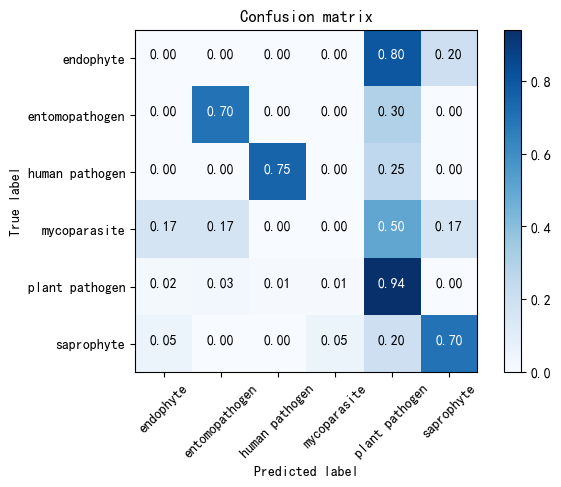

In [134]:
odf = plot_confuse(knn,X_test,y_test)

In [135]:
# output confusion matrix
odf.to_csv('confusion_matrix_basic_genomic_features.csv')

# Based on functional protein groups

## data table of functional groups

In [200]:
df5 = df3[df5_col_lst]
df5

,Lifestyle,Secreted_protein_number,Effector_number,Protease,Lipase,SSPs,Other,CAZy,GH,GT,...,FCWDE,Cellulose,Hemicellulose,Lignin,Pectin,Peptidoglycan,Mannan,Glucan,Chitin,Sucrose
3,human pathogen,622.0,160.0,58.0,7.0,69.0,242.0,155.0,78.0,2.0,...,17.0,37.0,21.0,1.0,5.0,1.0,2.0,5.0,9.0,0.0
4,human pathogen,733.0,188.0,71.0,6.0,95.0,285.0,183.0,100.0,1.0,...,28.0,38.0,29.0,1.0,6.0,1.0,4.0,5.0,18.0,0.0
5,plant pathogen,401.0,97.0,54.0,2.0,37.0,146.0,102.0,77.0,2.0,...,22.0,5.0,4.0,2.0,5.0,1.0,5.0,7.0,9.0,2.0
6,plant pathogen,387.0,80.0,51.0,6.0,37.0,146.0,104.0,75.0,3.0,...,28.0,5.0,4.0,2.0,4.0,1.0,8.0,9.0,10.0,1.0
8,mycoparasite,1345.0,300.0,247.0,18.0,116.0,439.0,341.0,213.0,6.0,...,47.0,45.0,35.0,2.0,36.0,1.0,8.0,20.0,17.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,entomopathogen,534.0,193.0,63.0,16.0,45.0,200.0,62.0,36.0,5.0,...,15.0,0.0,0.0,3.0,3.0,0.0,2.0,6.0,7.0,1.0
633,saprophyte,772.0,189.0,70.0,14.0,100.0,288.0,211.0,112.0,1.0,...,20.0,45.0,35.0,1.0,5.0,0.0,3.0,8.0,9.0,1.0
635,mycoparasite,280.0,68.0,31.0,4.0,46.0,131.0,46.0,25.0,3.0,...,9.0,3.0,2.0,1.0,3.0,0.0,0.0,6.0,2.0,0.0
636,saprophyte,860.0,196.0,126.0,14.0,66.0,281.0,243.0,170.0,3.0,...,50.0,22.0,23.0,5.0,26.0,1.0,14.0,15.0,17.0,1.0


## Correlation analysis

In [202]:
corr = df5.set_index('Lifestyle').corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\cheny\AppData\Local\Temp\ipykernel_15004\3021354255.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Secreted_protein_number,Effector_number,Protease,Lipase,SSPs,Other,CAZy,GH,GT,PL,CE,AA,CBM,PCWDE,FCWDE,Cellulose,Hemicellulose,Lignin,Pectin,Peptidoglycan,Mannan,Glucan,Chitin,Sucrose
Secreted_protein_number,1.00,0.96,0.93,0.86,0.87,0.97,0.95,0.93,0.28,0.83,0.78,0.90,0.56,0.90,0.45,0.80,0.78,0.53,0.86,0.03,0.27,0.51,0.36,0.21
Effector_number,0.96,1.00,0.87,0.82,0.82,0.91,0.88,0.86,0.29,0.75,0.74,0.83,0.47,0.80,0.47,0.69,0.71,0.53,0.77,0.04,0.29,0.52,0.38,0.22
Protease,0.93,0.87,1.00,0.80,0.77,0.89,0.85,0.87,0.35,0.77,0.61,0.77,0.56,0.77,0.57,0.65,0.64,0.54,0.77,0.17,0.35,0.55,0.50,0.10
Lipase,0.86,0.82,0.80,1.00,0.80,0.88,0.76,0.75,0.18,0.70,0.54,0.74,0.45,0.75,0.30,0.66,0.55,0.42,0.78,-0.11,0.22,0.36,0.22,-0.04
SSPs,0.87,0.82,0.77,0.80,1.00,0.90,0.78,0.77,0.09,0.66,0.58,0.80,0.40,0.79,0.29,0.78,0.61,0.51,0.75,-0.06,0.27,0.31,0.18,0.07
Other,0.97,0.91,0.89,0.88,0.90,1.00,0.89,0.88,0.22,0.78,0.71,0.87,0.55,0.86,0.37,0.79,0.72,0.46,0.84,-0.01,0.23,0.43,0.29,0.15
CAZy,0.95,0.88,0.85,0.76,0.78,0.89,1.00,0.97,0.29,0.88,0.88,0.94,0.57,0.97,0.41,0.87,0.89,0.54,0.90,-0.00,0.22,0.51,0.31,0.30
GH,0.93,0.86,0.87,0.75,0.77,0.88,0.97,1.00,0.26,0.79,0.80,0.86,0.51,0.94,0.55,0.81,0.86,0.53,0.88,0.08,0.38,0.58,0.41,0.25
GT,0.28,0.29,0.35,0.18,0.09,0.22,0.29,0.26,1.00,0.34,0.27,0.17,0.29,0.18,0.26,0.07,0.22,0.16,0.21,0.22,-0.06,0.35,0.30,0.15
PL,0.83,0.75,0.77,0.70,0.66,0.78,0.88,0.79,0.34,1.00,0.78,0.83,0.61,0.84,0.19,0.75,0.72,0.52,0.85,-0.11,-0.07,0.38,0.16,0.23


## Remove features that have same value in all samples

In [203]:
X = df5.iloc[:, 1:25]
y = df5.iloc[:, 0]

# scaled numerical features 
X = df5.iloc[:,1:25]
standardscaler = StandardScaler()
standardscaler.fit(X)
X_scaled =  standardscaler.transform(X)
X_scaled

array([[-0.5125563 , -0.44491107, -1.05065991, ..., -1.30810526,
        -0.44770847, -0.98527772],
       [-0.16363115, -0.1308562 , -0.73386014, ..., -1.30810526,
         1.31164306, -0.98527772],
       [-1.20726315, -1.15153453, -1.14813676, ..., -0.84133065,
        -0.44770847,  0.61636095],
       ...,
       [-1.587623  , -1.47680565, -1.70862867, ..., -1.07471795,
        -1.816093  , -0.98527772],
       [ 0.23558953, -0.04112623,  0.60644658, ...,  1.0257678 ,
         1.11615955, -0.18445839],
       [-1.587623  , -1.40950817, -1.3918289 , ..., -0.84133065,
        -0.83867548, -0.98527772]])

In [204]:
X_scaled.shape

(534, 24)

In [140]:
sel = VarianceThreshold(threshold=0)
sel

VarianceThreshold(threshold=0)

In [141]:
sel.fit_transform(X).shape

(534, 24)

In [142]:
# number of features to fit
print('number of features to fit:\n', sel.n_features_in_)
print('feature names of input\n', sel.feature_names_in_)
print()

print('number of features to out:\n',sel.get_feature_names_out().shape[0])
print('feature names after filter:\n',sel.get_feature_names_out()) 
print()

# variance of each feature
print("variance of each feature:\n",sel.variances_) 

number of features to fit:
 24
feature names of input
 ['Secreted_protein_number' 'Effector_number' 'Protease' 'Lipase' 'SSPs'
 'Other' 'CAZy' 'GH' 'GT' 'PL' 'CE' 'AA' 'CBM' 'PCWDE' 'FCWDE' 'Cellulose'
 'Hemicellulose' 'Lignin' 'Pectin' 'Peptidoglycan' 'Mannan' 'Glucan'
 'Chitin' 'Sucrose']

number of features to out:
 24
feature names after filter:
 ['Secreted_protein_number' 'Effector_number' 'Protease' 'Lipase' 'SSPs'
 'Other' 'CAZy' 'GH' 'GT' 'PL' 'CE' 'AA' 'CBM' 'PCWDE' 'FCWDE' 'Cellulose'
 'Hemicellulose' 'Lignin' 'Pectin' 'Peptidoglycan' 'Mannan' 'Glucan'
 'Chitin' 'Sucrose']

variance of each feature:
 [1.40800000e+03 4.36000000e+02 2.32000000e+02 4.20000000e+01
 1.58000000e+02 4.80000000e+02 3.97000000e+02 2.11000000e+02
 2.43490581e+00 6.40000000e+01 4.00000000e+01 8.60000000e+01
 3.49971594e+00 1.54000000e+02 5.90000000e+01 5.10000000e+01
 4.00000000e+01 4.22941828e+00 5.40000000e+01 5.15829932e-01
 8.51373985e+00 1.83588527e+01 2.61685569e+01 1.55930438e+00]


In [205]:
# split data into trainning data and test data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=111)

## KNN

In [144]:
#gridsearchCV optimize parameters to improve estimator
params = {'n_neighbors': [i for i in range(1, 15)],
          'weights': ['uniform', 'distance'],
          'p': [1,2]}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)


print('Label: ', grid.classes_)
print()
print("Accuracy in test dataset：", grid.score(X_test,y_test))
print("Best score in cross validation：", grid.best_score_)
print("Best model：", grid.best_estimator_)

# to obtain the average cuuracy by corss_validation
knn = grid.best_estimator_
knn_sm = cross_val_score(knn, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
print(knn_sm)


Label:  ['endophyte' 'entomopathogen' 'human pathogen' 'mycoparasite'
 'plant pathogen' 'saprophyte']

Accuracy in test dataset： 0.8509316770186336
Best score in cross validation： 0.8095855855855856
Best model： KNeighborsClassifier(n_neighbors=3, weights='distance')
[0.84       0.81333333 0.8        0.78378378 0.81081081]


## Logistic Regression

In [145]:
parameters = {'multi_class': ['multinomial'],
              
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
             }

lr = LogisticRegression(max_iter=5000, class_weight='balanced')
grid = GridSearchCV(
    lr, parameters,  verbose=0, scoring='accuracy', cv=5)

grid = grid.fit(X_train, y_train)

print('Best score：%0.3f' % grid.best_score_)
best_parameters = grid.best_estimator_.get_params()
print('Best prameters：n', best_parameters)

lr = grid.best_estimator_
lr_sm = cross_val_score(lr, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
print(lr_sm)


Best score：0.641
Best prameters：n {'C': 0.1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 5000, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[0.72       0.69333333 0.58666667 0.63513514 0.56756757]


## SVM

In [146]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm = SVC()
grid = GridSearchCV(
    svm, tuned_parameters,  verbose=0, scoring='accuracy', cv=5)

grid = grid.fit(X_train, y_train)

print('Best score：%0.3f' % grid.best_score_)
best_parameters = grid.best_estimator_.get_params()
print('Best prameters：n', best_parameters)

svm = grid.best_estimator_
svm_sm = cross_val_score(svm, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
print(svm_sm)


Best score：0.812
Best prameters：n {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
[0.82666667 0.81333333 0.81333333 0.78378378 0.82432432]


## Naive Bayes

In [147]:
gaussian = GaussianNB()
multi = MultinomialNB() # not for minus values of features
bernoul = BernoulliNB()
models = [gaussian, bernoul]

gaussian =  GaussianNB() 
cross_val_score(gaussian, X_train, y_train, scoring='accuracy',
                         cv=5).mean()  # cross_validation


0.6031351351351351

In [148]:
cross_val_score(bernoul, X_train, y_train, scoring='accuracy',
                         cv=5).mean()  # cross_validation

0.5951351351351352

In [149]:
bayes_sm = cross_val_score(gaussian, X_train, y_train, scoring='accuracy',
                         cv=5)
bayes_sm

array([0.58666667, 0.64      , 0.61333333, 0.62162162, 0.55405405])

## Decision Tree

In [150]:
# 用GridSearchCV寻找最优参数（列表）
param = [{'criterion':['gini'],'max_depth':[30,50,60,100],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5]},
         {'criterion':['gini','entropy']},
         {'max_depth': [30,60,100], 'min_impurity_decrease':[0.1,0.2,0.5]}]
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param, scoring='accuracy', cv=5)
grid.fit(X_train,y_train)

print('最优分类器:',grid.best_params_,'最优分数:', grid.best_score_)  # 得到最优的参数和分值

dt = grid.best_estimator_
dt_sm = cross_val_score(dt, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
print(dt_sm)

最优分类器: {'criterion': 'gini'} 最优分数: 0.7051531531531531
[0.77333333 0.6        0.73333333 0.68918919 0.74324324]


## RFC

In [206]:
param_test1 = {"n_estimators":range(1,101,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,
                         scoring='accuracy',cv=5)
gsearch1.fit(X_train,y_train)
 
print("best score:", gsearch1.best_score_)
print("best n_estimators", gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

rfc = gsearch1.best_estimator_
rfc_sm = cross_val_score(rfc, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
print(rfc_sm)

best score: 0.8202882882882884
best n_estimators {'n_estimators': 31}
best accuracy:0.820288
[0.78666667 0.81333333 0.85333333 0.78378378 0.82432432]


In [152]:
X_train.shape

(373, 24)

## Accuracies of classifiers

In [153]:
accuracy_df = pd.DataFrame({'KNN':knn_sm,
                            'LR':lr_sm,
                            'SVM':svm_sm,
                            'Bayes':bayes_sm,
                            'DT':dt_sm,
                            'RF':rfc_sm
})
accuracy_df

,KNN,LR,SVM,Bayes,DT,RF
0,0.840000,0.720000,0.826667,0.586667,0.773333,0.813333
1,0.813333,0.693333,0.813333,0.640000,0.600000,0.813333
2,0.800000,0.586667,0.813333,0.613333,0.733333,0.853333
3,0.783784,0.635135,0.783784,0.621622,0.689189,0.797297
4,0.810811,0.567568,0.824324,0.554054,0.743243,0.810811


In [154]:
accuracy_df.mean()

KNN      0.809586
LR       0.640541
SVM      0.812288
Bayes    0.603135
DT       0.707820
RF       0.817622
dtype: float64

In [155]:
df_accuracy = accuracy_df.melt(var_name='Classifier',value_name='Accuracy')
# output accuracies of clasifiers
df_accuracy.to_csv('classifiers_accuracy_function_groups.csv')


In [156]:
df_accuracy.mean()

C:\Users\cheny\AppData\Local\Temp\ipykernel_15004\209495019.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_accuracy.mean()


Accuracy    0.731832
dtype: float64

<AxesSubplot:xlabel='Classifier', ylabel='Accuracy'>

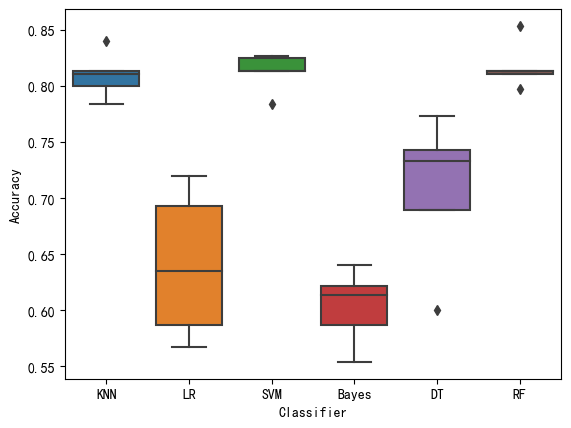

In [157]:
sns.boxplot(data=df_accuracy, x='Classifier', y='Accuracy')

 ## use the best classifier to predict and use confusion_matrix to display the accuracy

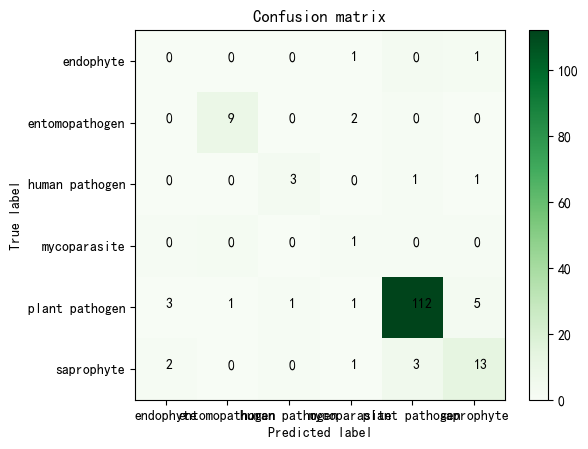

In [158]:
plot_confuse_data(rfc,X_test,y_test)

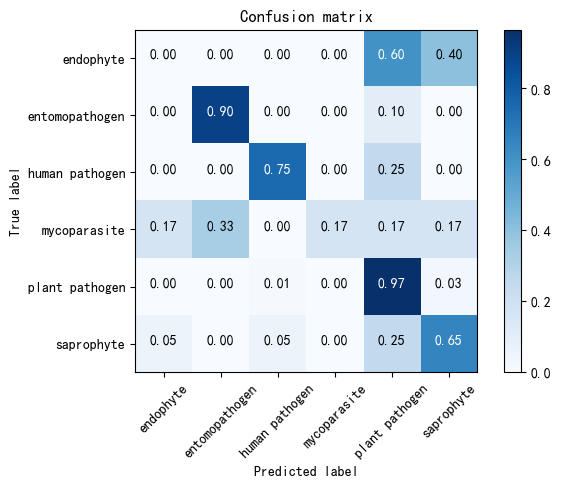

In [159]:
odf = plot_confuse(rfc,X_test,y_test)

In [160]:
# output confusion matrix
odf.to_csv('confusion_matrix_functional_protein_groups.csv')

 # based on concatenated datasets

## data table

In [161]:
df6 = df3[df6_col_lst]
df6

,Lifestyle,Genome_size,GC_content,Genome_size_without_TE,TE_size,GC_content_without_TE,GC_content_TE,Gene_number,Gene_length_min,Gene_length_max,...,FCWDE,Cellulose,Hemicellulose,Lignin,Pectin,Peptidoglycan,Mannan,Glucan,Chitin,Sucrose
3,human pathogen,39610346.0,49.201,37550957.0,2059389.0,50.862,18.927,9686.0,163.0,24657.0,...,17.0,37.0,21.0,1.0,5.0,1.0,2.0,5.0,9.0,0.0
4,human pathogen,43295657.0,50.693,41927685.0,1367972.0,51.353,30.467,11116.0,122.0,23902.0,...,28.0,38.0,29.0,1.0,6.0,1.0,4.0,5.0,18.0,0.0
5,plant pathogen,29710167.0,51.872,28982425.0,727742.0,52.265,36.217,8681.0,201.0,19326.0,...,22.0,5.0,4.0,2.0,5.0,1.0,5.0,7.0,9.0,2.0
6,plant pathogen,30032304.0,55.471,29643153.0,389151.0,55.574,47.643,8458.0,201.0,18051.0,...,28.0,5.0,4.0,2.0,4.0,1.0,8.0,9.0,10.0,1.0
8,mycoparasite,55053633.0,49.805,53878192.0,1175441.0,50.286,27.740,16563.0,201.0,65700.0,...,47.0,45.0,35.0,2.0,36.0,1.0,8.0,20.0,17.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,entomopathogen,37905707.0,45.904,26525138.0,11380569.0,52.557,30.398,7633.0,201.0,15192.0,...,15.0,0.0,0.0,3.0,3.0,0.0,2.0,6.0,7.0,1.0
633,saprophyte,36889590.0,53.136,36332397.0,557193.0,53.248,45.857,10543.0,106.0,24127.0,...,20.0,45.0,35.0,1.0,5.0,0.0,3.0,8.0,9.0,1.0
635,mycoparasite,28295542.0,49.826,26914281.0,1381261.0,50.335,39.905,7006.0,90.0,23185.0,...,9.0,3.0,2.0,1.0,3.0,0.0,0.0,6.0,2.0,0.0
636,saprophyte,35345045.0,54.713,35175804.0,169241.0,54.720,53.284,11570.0,201.0,45228.0,...,50.0,22.0,23.0,5.0,26.0,1.0,14.0,15.0,17.0,1.0


## correlation analysis

In [162]:
corr = df6.set_index('Lifestyle').corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\cheny\AppData\Local\Temp\ipykernel_15004\931007957.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Genome_size,GC_content,Genome_size_without_TE,TE_size,GC_content_without_TE,GC_content_TE,Gene_number,Gene_length_min,Gene_length_max,Gene_length_mean,Intergenic_length_min,Intergenic_length_max,Intergenic_length_mean,Exon_number,Exon_length_min,Exon_length_max,Exon_length_mean,Intron_number,Intron_length_min,Intron_length_max,Intron_length_mean,tRNA_number,tRNA_length_min,tRNA_length_max,tRNA_length_mean,Secreted_protein_number,Effector_number,Protease,Lipase,SSPs,Other,CAZy,GH,GT,PL,CE,AA,CBM,PCWDE,FCWDE,Cellulose,Hemicellulose,Lignin,Pectin,Peptidoglycan,Mannan,Glucan,Chitin,Sucrose
Genome_size,1.00,-0.43,0.84,0.65,-0.14,-0.34,0.68,0.08,0.06,-0.44,-0.12,0.32,0.42,0.69,0.06,0.11,-0.44,0.68,0.09,-0.07,-0.24,0.40,-0.20,0.39,0.30,0.74,0.73,0.66,0.68,0.74,0.74,0.66,0.65,0.22,0.61,0.51,0.63,0.39,0.65,0.29,0.58,0.50,0.45,0.66,-0.02,0.20,0.33,0.20,0.07
GC_content,-0.43,1.00,-0.21,-0.49,0.83,0.39,-0.20,0.01,-0.08,0.25,0.14,-0.17,-0.12,-0.19,-0.03,0.01,0.12,-0.19,0.05,0.21,0.27,-0.29,0.08,0.00,-0.10,-0.15,-0.22,-0.08,-0.05,-0.08,-0.10,-0.15,-0.13,-0.08,-0.14,-0.22,-0.12,-0.01,-0.11,-0.13,-0.07,-0.19,-0.06,-0.06,-0.02,-0.05,-0.21,-0.06,-0.27
Genome_size_without_TE,0.84,-0.21,1.00,0.15,-0.18,-0.26,0.91,0.05,0.12,-0.57,-0.13,0.08,0.11,0.91,0.06,0.19,-0.50,0.89,0.07,-0.15,-0.40,0.48,-0.21,0.38,0.32,0.91,0.87,0.84,0.81,0.80,0.91,0.85,0.84,0.30,0.77,0.67,0.79,0.57,0.82,0.41,0.72,0.69,0.44,0.81,0.07,0.21,0.50,0.32,0.11
TE_size,0.65,-0.49,0.15,1.00,-0.01,-0.26,-0.03,0.08,-0.07,-0.01,-0.04,0.48,0.62,-0.01,0.02,-0.06,-0.12,0.00,0.07,0.08,0.12,0.06,-0.08,0.19,0.10,0.07,0.12,0.03,0.11,0.23,0.08,0.02,0.02,-0.01,0.04,-0.01,0.04,-0.09,0.04,-0.04,0.06,-0.05,0.21,0.09,-0.14,0.08,-0.09,-0.07,-0.03
GC_content_without_TE,-0.14,0.83,-0.18,-0.01,1.00,0.16,-0.28,0.08,-0.15,0.30,0.11,0.08,0.12,-0.25,-0.04,-0.03,0.05,-0.23,0.12,0.31,0.44,-0.34,0.05,0.11,-0.06,-0.14,-0.19,-0.09,0.00,0.05,-0.08,-0.18,-0.15,-0.10,-0.16,-0.30,-0.14,-0.09,-0.11,-0.19,-0.06,-0.28,0.07,-0.02,-0.13,0.01,-0.31,-0.14,-0.37
GC_content_TE,-0.34,0.39,-0.26,-0.26,0.16,1.00,-0.16,-0.27,-0.07,0.10,0.21,-0.28,-0.17,-0.22,0.05,-0.03,0.25,-0.23,-0.33,-0.01,0.07,-0.06,0.00,-0.13,-0.24,-0.23,-0.25,-0.22,-0.25,-0.24,-0.22,-0.20,-0.25,-0.05,-0.13,-0.11,-0.14,-0.07,-0.21,-0.22,-0.16,-0.16,-0.15,-0.22,0.00,-0.26,-0.20,-0.12,0.11
Gene_number,0.68,-0.20,0.91,-0.03,-0.28,-0.16,1.00,-0.07,0.13,-0.72,-0.11,-0.08,-0.18,0.97,0.01,0.30,-0.50,0.94,-0.04,-0.22,-0.59,0.45,-0.16,0.30,0.29,0.88,0.84,0.82,0.73,0.69,0.86,0.84,0.81,0.40,0.77,0.74,0.74,0.67,0.76,0.42,0.66,0.73,0.26,0.73,0.20,0.10,0.55,0.36,0.26
Gene_length_min,0.08,0.01,0.05,0.08,0.08,-0.27,-0.07,1.00,0.10,0.25,-0.18,0.33,0.33,0.03,0.03,-0.08,-0.05,0.04,0.69,0.16,0.07,-0.05,0.13,0.01,0.14,0.08,0.06,0.11,0.11,0.03,0.08,0.07,0.12,-0.03,-0.02,-0.02,0.06,-0.03,0.08,0.16,0.04,0.03,0.15,0.09,0.02,0.22,0.04,0.15,-0.11
Gene_length_max,0.06,-0.08,0.12,-0.07,-0.15,-0.07,0.13,0.10,1.00,-0.04,-0.01,0.04,-0.02,0.17,0.08,0.24,-0.11,0.18,0.06,-0.08,-0.25,0.12,0.10,-0.13,-0.09,0.09,0.07,0.21,-0.03,-0.08,0.01,0.14,0.18,0.35,0.16,0.07,0.02,0.17,0.09,0.44,0.00,0.15,0.25,0.07,0.28,0.13,0.44,0.43,-0.10
Gene_length_mean,-0.44,0.25,-0.57,-0.01,0.30,0.10,-0.72,0.25,-0.04,1.00,0.01,0.17,0.31,-0.65,0.01,-0.34,0.51,-0.62,0.24,0.44,0.77,-0.33,0.20,-0.18,-0.31,-0.64,-0.65,-0.61,-0.45,-0.51,-0.56,-0.64,-0.61,-0.35,-0.59,-0.61,-0.57,-0.41,-0.54,-0.34,-0.47,-0.56,-0.24,-0.49,-0.18,-0.11,-0.41,-0.31,-0.31


## scale numerical data

In [163]:
X = df6.iloc[:, 1:50]
y = df6.iloc[:, 0]

# scaled numerical features 
X = df6.iloc[:,1:50]
standardscaler = StandardScaler()
standardscaler.fit(X)
X_scaled =  standardscaler.transform(X)
X_scaled

array([[-0.24530302, -0.28989521, -0.23602465, ..., -1.30810526,
        -0.44770847, -0.98527772],
       [ 0.06983864,  0.1111975 ,  0.25367681, ..., -1.30810526,
         1.31164306, -0.98527772],
       [-1.0918961 ,  0.42814675, -1.19473686, ..., -0.84133065,
        -0.44770847,  0.61636095],
       ...,
       [-1.2128648 , -0.12187715, -1.42613647, ..., -1.07471795,
        -1.816093  , -0.98527772],
       [-0.6100413 ,  1.19188963, -0.50177474, ...,  1.0257678 ,
         1.11615955, -0.18445839],
       [-1.76014552,  0.73488052, -1.99002084, ..., -0.84133065,
        -0.83867548, -0.98527772]])

In [164]:
# split data into trainning data and test data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=111)

## KNN

In [165]:
#gridsearchCV optimize parameters to improve estimator
params = {'n_neighbors': [i for i in range(1, 15)],
          'weights': ['uniform', 'distance'],
          'p': [1,2]}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)


print('Label: ', grid.classes_)
print()
print("Accuracy in test dataset：", grid.score(X_test,y_test))
print("Best score in cross validation：", grid.best_score_)
print("Best model：", grid.best_estimator_)

# to obtain the average cuuracy by corss_validation
knn = grid.best_estimator_
knn_sm = cross_val_score(knn, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
print(knn_sm)


Label:  ['endophyte' 'entomopathogen' 'human pathogen' 'mycoparasite'
 'plant pathogen' 'saprophyte']

Accuracy in test dataset： 0.8136645962732919
Best score in cross validation： 0.8230270270270271
Best model： KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')
[0.86666667 0.8        0.81333333 0.78378378 0.85135135]


## Logistic Regression

In [166]:
parameters = {'multi_class': ['multinomial'],
              
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
             }

lr = LogisticRegression(max_iter=5000, class_weight='balanced')
grid = GridSearchCV(
    lr, parameters,  verbose=0, scoring='accuracy', cv=5)

grid = grid.fit(X_train, y_train)

print('Best score：%0.3f' % grid.best_score_)
best_parameters = grid.best_estimator_.get_params()
print('Best prameters：n', best_parameters)

lr = grid.best_estimator_
lr_sm = cross_val_score(lr, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
print(lr_sm)


Best score：0.665
Best prameters：n {'C': 100, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 5000, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[0.68       0.74666667 0.69333333 0.58108108 0.62162162]


## SVM

In [167]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm = SVC()
grid = GridSearchCV(
    svm, tuned_parameters,  verbose=0, scoring='accuracy', cv=5)

grid = grid.fit(X_train, y_train)

print('Best score：%0.3f' % grid.best_score_)
best_parameters = grid.best_estimator_.get_params()
print('Best prameters：n', best_parameters)

svm = grid.best_estimator_
svm_sm = cross_val_score(svm, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
print(svm_sm)

Best score：0.788
Best prameters：n {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
[0.76       0.81333333 0.8        0.74324324 0.82432432]


## Naive Bayes

In [168]:
gaussian = GaussianNB()
multi = MultinomialNB() # not for minus values of features
bernoul = BernoulliNB()
models = [gaussian, bernoul]

gaussian =  GaussianNB() 

In [169]:
cross_val_score(gaussian, X_train, y_train, scoring='accuracy',
                         cv=5).mean()  # cross_validation

0.49336936936936937

In [170]:
cross_val_score(bernoul, X_train, y_train, scoring='accuracy',
                         cv=5).mean()  # cross_validation

0.586990990990991

In [171]:
bayes_sm = cross_val_score(bernoul, X_train, y_train, scoring='accuracy',
                         cv=5)
bayes_sm

array([0.57333333, 0.62666667, 0.61333333, 0.60810811, 0.51351351])

## Decision Tree

In [172]:
# 用GridSearchCV寻找最优参数（列表）
param = [{'criterion':['gini'],'max_depth':[30,50,60,100],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5]},
         {'criterion':['gini','entropy']},
         {'max_depth': [30,60,100], 'min_impurity_decrease':[0.1,0.2,0.5]}]
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param, scoring='accuracy', cv=5)
grid.fit(X_train,y_train)

print('最优分类器:',grid.best_params_,'最优分数:', grid.best_score_)  # 得到最优的参数和分值

dt = grid.best_estimator_
dt_sm = cross_val_score(dt, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
print(dt_sm)

最优分类器: {'criterion': 'entropy'} 最优分数: 0.7130090090090089
[0.73333333 0.72       0.68       0.67567568 0.71621622]


## RFC

In [173]:
param_test1 = {"n_estimators":range(1,101,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,
                         scoring='accuracy',cv=5)
gsearch1.fit(X_train,y_train)
 
print("best score:", gsearch1.best_score_)
print("best n_estimators", gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

rfc = gsearch1.best_estimator_
rfc_sm = cross_val_score(rfc, X_train, y_train, scoring='accuracy',
                         cv=5)  # cross_validation
print(rfc_sm)

best score: 0.8230270270270271
best n_estimators {'n_estimators': 31}
best accuracy:0.823027
[0.81333333 0.8        0.84       0.78378378 0.81081081]


## Accuracies of classifiers

In [174]:
accuracy_df = pd.DataFrame({'KNN':knn_sm,
                            'LR':lr_sm,
                            'SVM':svm_sm,
                            'Bayes':bayes_sm,
                            'DT':dt_sm,
                            'RF':rfc_sm
})
accuracy_df

,KNN,LR,SVM,Bayes,DT,RF
0,0.866667,0.680000,0.760000,0.573333,0.733333,0.813333
1,0.800000,0.746667,0.813333,0.626667,0.720000,0.800000
2,0.813333,0.693333,0.800000,0.613333,0.680000,0.840000
3,0.783784,0.581081,0.743243,0.608108,0.675676,0.783784
4,0.851351,0.621622,0.824324,0.513514,0.716216,0.810811


In [175]:
accuracy_df.mean()

KNN      0.823027
LR       0.664541
SVM      0.788180
Bayes    0.586991
DT       0.705045
RF       0.809586
dtype: float64

In [176]:
df_accuracy = accuracy_df.melt(var_name='Classifier',value_name='Accuracy')
# output accuracies of clasifiers
df_accuracy.to_csv('classifiers_accuracy_together.csv')

In [177]:
df_accuracy.mean()

C:\Users\cheny\AppData\Local\Temp\ipykernel_15004\209495019.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_accuracy.mean()


Accuracy    0.729562
dtype: float64

<AxesSubplot:xlabel='Classifier', ylabel='Accuracy'>

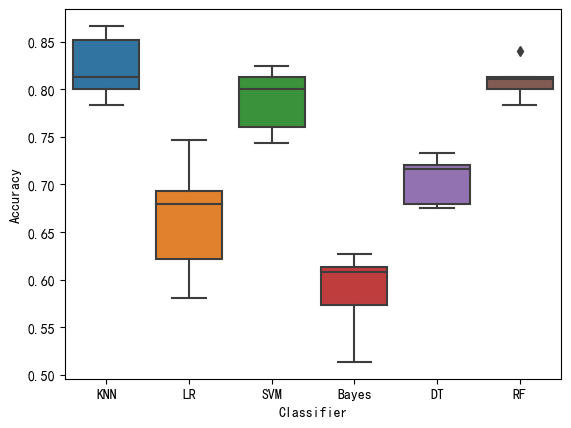

In [178]:
sns.boxplot(data=df_accuracy, x='Classifier', y='Accuracy')

## confusion matrix

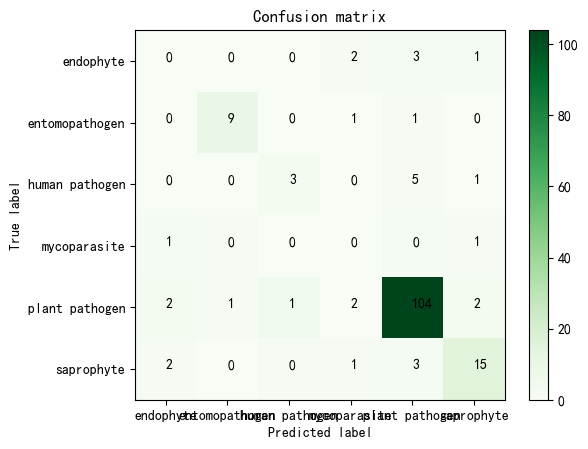

In [179]:
plot_confuse_data(knn,X_test,y_test)

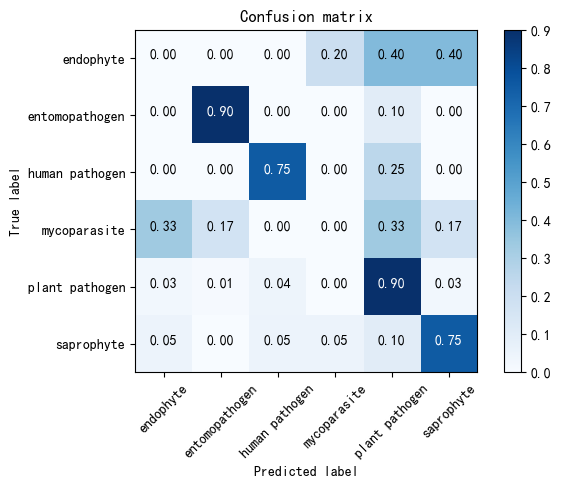

In [180]:
odf = plot_confuse(knn,X_test,y_test)

In [181]:
# output confusion matrix
odf.to_csv('confusion_matrix_together.csv')

In [182]:
# done

# Prediction

In [116]:
X_test

array([[-0.08798903, -0.86626434, -0.03132802, ...,  2.42609164,
         2.87551108, -0.98527772],
       [-1.35385959,  0.38540296, -1.68119492, ..., -1.07471795,
        -1.42512599, -0.18445839],
       [ 0.51059628,  0.74617133,  0.94149948, ...,  0.55899319,
        -0.25222497, -0.18445839],
       ...,
       [ 1.09125021, -1.85179105,  0.69267664, ..., -0.14116873,
        -0.25222497,  1.41718028],
       [-0.62774145,  0.68192122, -0.76483014, ..., -1.54149256,
        -1.42512599, -0.98527772],
       [ 0.00462889, -0.42430965,  0.28963859, ...,  1.49254242,
         0.13874204,  1.41718028]])

In [190]:
df_undetermined = df1[ df1['Lifestyle'] == "undetermined" ]
df_undetermined = df_undetermined[df5_col_lst]


In [191]:
df_undetermined.columns

Index(['Lifestyle', 'Secreted_protein_number', 'Effector_number', 'Protease',
       'Lipase', 'SSPs', 'Other', 'CAZy', 'GH', 'GT', 'PL', 'CE', 'AA', 'CBM',
       'PCWDE', 'FCWDE', 'Cellulose', 'Hemicellulose', 'Lignin', 'Pectin',
       'Peptidoglycan', 'Mannan', 'Glucan', 'Chitin', 'Sucrose'],
      dtype='object')

In [192]:
X_undertemined = df_undetermined.iloc[:, 1:25]
standardscaler = StandardScaler()
standardscaler.fit(X_undertemined)
X_undertemined_scaled =  standardscaler.transform(X_undertemined)
X_undertemined_scaled

array([[-0.65931175, -0.61246202, -0.95578035, ..., -0.22237893,
        -0.82143846, -0.75737523],
       [-0.49676665, -0.37469649, -0.80653972, ...,  0.29995297,
        -1.0438655 , -0.75737523],
       [ 0.30889167,  0.33860008,  0.56149941, ...,  0.82228486,
         0.29069672, -0.75737523],
       ...,
       [-0.79005455, -0.90306432, -0.70704597, ..., -0.48354487,
        -0.37658439, -0.75737523],
       [-1.28122343, -1.32575859, -1.27913506, ..., -2.05054055,
        -1.93357364,  0.05640028],
       [-0.0904039 , -0.30865051, -0.30907095, ..., -1.00587677,
        -1.26629253, -0.75737523]])

In [193]:
len(X_undertemined_scaled)

101

In [240]:
rfc.classes_

array(['endophyte', 'entomopathogen', 'human pathogen', 'mycoparasite',
       'plant pathogen', 'saprophyte'], dtype=object)

In [241]:
y_pred = rfc.predict(X_undertemined_scaled)
pred_lst = y_pred.tolist()

In [242]:
y_prob = rfc.predict_proba(X_undertemined_scaled)

In [243]:
predicted_df = pd.DataFrame(y_prob).rename(columns={0:'endophyte', 1:'entomopathogen', 2:'human pathogen',3:'mycoparasite',4:'plant pathogen',5:'saprophyte'})

In [244]:
predicted_df['predicted_lifestyle'] = pred_lst
predicted_df

,endophyte,entomopathogen,human pathogen,mycoparasite,plant pathogen,saprophyte,predicted_lifestyle
0,0.064516,0.000000,0.161290,0.000000,0.419355,0.354839,plant pathogen
1,0.032258,0.000000,0.161290,0.032258,0.580645,0.193548,plant pathogen
2,0.032258,0.000000,0.032258,0.000000,0.290323,0.645161,saprophyte
3,0.225806,0.000000,0.064516,0.000000,0.483871,0.225806,plant pathogen
4,0.000000,0.000000,0.000000,0.419355,0.387097,0.193548,mycoparasite
...,...,...,...,...,...,...,...
96,0.096774,0.032258,0.129032,0.032258,0.419355,0.290323,plant pathogen
97,0.064516,0.000000,0.000000,0.000000,0.935484,0.000000,plant pathogen
98,0.032258,0.096774,0.064516,0.064516,0.516129,0.225806,plant pathogen
99,0.032258,0.064516,0.064516,0.000000,0.709677,0.129032,plant pathogen


In [245]:
predicted_df.to_excel('TableS7_predicted_lifestyle.xlsx')

In [217]:
predicted_df.shape

(101, 7)

In [237]:
predicted_df

,endophyte,entomopathogen,human pathogen,mycoparasite,plant pathogen,saprophyte,predicted_lifestyle,Assembly
0,0.064516,0.000000,0.161290,0.000000,0.419355,0.354839,plant pathogen,GCA_000604185.2
1,0.032258,0.000000,0.161290,0.032258,0.580645,0.193548,plant pathogen,GCA_000604205.2
2,0.032258,0.000000,0.032258,0.000000,0.290323,0.645161,saprophyte,GCA_000751375.2
3,0.225806,0.000000,0.064516,0.000000,0.483871,0.225806,plant pathogen,NaN
4,0.000000,0.000000,0.000000,0.419355,0.387097,0.193548,mycoparasite,NaN
...,...,...,...,...,...,...,...,...
96,0.096774,0.032258,0.129032,0.032258,0.419355,0.290323,plant pathogen,NaN
97,0.064516,0.000000,0.000000,0.000000,0.935484,0.000000,plant pathogen,NaN
98,0.032258,0.096774,0.064516,0.064516,0.516129,0.225806,plant pathogen,NaN
99,0.032258,0.064516,0.064516,0.000000,0.709677,0.129032,plant pathogen,NaN


In [246]:
df8 = df1[ df1['Lifestyle'] == "undetermined" ]

In [247]:
df8.to_excel('101_predicted.xlsx')

In [248]:
df8.columns

Index(['Assembly', 'Strain', 'longLabel', 'Class', 'Subclass', 'Order',
       'Family', 'Genus', 'Link', 'Name_NCBI', 'Name_this_study',
       'Strain_or_specimen', 'Lifestyle', 'Lifestyle_ref', 'Gender',
       'Gender_ref', 'Habitat', 'Habitat_ref', 'Sources', 'Comment',
       'WGS_platform', 'WGS_platform_ref', 'WGS_class', 'WGS_class_details',
       'Genome_size', 'GC_content', 'Contig_scaffold_number', 'N50', 'BUSCO',
       'Genome_size_without_TE', 'TE_size', 'GC_content_without_TE',
       'GC_content_TE', 'Gene_number', 'GO_number', 'Gene_length_min',
       'Gene_length_max', 'Gene_length_mean', 'Intergenic_length_min',
       'Intergenic_length_max', 'Intergenic_length_mean', 'Exon_number',
       'Exon_length_min', 'Exon_length_max', 'Exon_length_mean',
       'Intron_number', 'Intron_length_min', 'Intron_length_max',
       'Intron_length_mean', 'Protein_number', 'tRNA_number',
       'tRNA_length_min', 'tRNA_length_max', 'tRNA_length_mean',
       'Secreted_protein_nu

In [249]:
df8 = df8[['Assembly', 'Strain', 'longLabel', 'Class', 'Subclass', 'Order',
       'Family', 'Genus', 'Link', 'Name_NCBI', 'Name_this_study',
       'Strain_or_specimen', 'Lifestyle']]
df8.shape

(101, 13)